### Sample program for grid search of hyper parameters  

#### Import libraries  

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from joblib import dump

#### Parameters  

In [28]:
csv_in = 'winequality-white_small.csv'

#### Read CSV file  

In [29]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1223, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1223 non-null   float64
 1   volatile_acidity      1223 non-null   float64
 2   citric_acid           1223 non-null   float64
 3   residual_sugar        1223 non-null   float64
 4   chlorides             1223 non-null   float64
 5   free_sulfur_dioxide   1223 non-null   float64
 6   total_sulfur_dioxide  1223 non-null   float64
 7   density               1223 non-null   float64
 8   pH                    1223 non-null   float64
 9   sulphates             1223 non-null   float64
 10  alcohol               1223 non-null   float64
 11  quality               1223 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 114.8 KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
1,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
2,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5
3,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7
4,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8


#### Get X and y  

In [30]:
X = df.iloc[:, :-1]  # explanatory variables
y = df['quality']  # objective variable
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (1223, 11)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
1,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0
2,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8
3,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4
4,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8


y: (1223,)
0    6
1    5
2    5
3    7
4    8
Name: quality, dtype: int64


#### Make pipeline and set parameters for grid search   

In [31]:
abc=GradientBoostingClassifier(random_state=3)            

param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [2, 4, 6, None],
}

#### Preparation of objects for cross validation  

In [32]:
grid_cv = KFold(n_splits=4, shuffle=True, random_state=5)  # for grid search
gen_cv = KFold(n_splits=4, shuffle=True, random_state=7)  # for estimation of generalization performance

#### Define the grid search for hyperparameters  

In [33]:
gs = GridSearchCV(abc, param_grid , cv=grid_cv, scoring='accuracy')

#### Estimation of generalization performance  

In [34]:
%%time
nested_score = cross_val_score(gs, X=X, y=y, cv=gen_cv,scoring='accuracy')


CPU times: user 12min 9s, sys: 36 ms, total: 12min 9s
Wall time: 12min 9s


In [35]:
print(nested_score)
print(nested_score.mean())

[0.4869281  0.58823529 0.54248366 0.58360656]
0.5503134040501446


**Generalization performance (RMSE) / 汎化性能 (平均2乗誤差平方根): 0.675**  

#### Cross-validation to obtain the model with the best hyperparameter set (best estimator)  
- Note: gs_best is already fit to the whole data (X) in gs.fit(X, y)  

In [36]:
%%time
gs.fit(X, y)
gs_best = gs.best_estimator_

CPU times: user 4min 4s, sys: 16 ms, total: 4min 4s
Wall time: 4min 4s


In [37]:
print(gs_best)
for k,v in gs_best.get_params(deep=True).items():
    print(k, '->', v)

GradientBoostingClassifier(max_depth=6, random_state=3)
ccp_alpha -> 0.0
criterion -> friedman_mse
init -> None
learning_rate -> 0.1
loss -> deviance
max_depth -> 6
max_features -> None
max_leaf_nodes -> None
min_impurity_decrease -> 0.0
min_impurity_split -> None
min_samples_leaf -> 1
min_samples_split -> 2
min_weight_fraction_leaf -> 0.0
n_estimators -> 100
n_iter_no_change -> None
random_state -> 3
subsample -> 1.0
tol -> 0.0001
validation_fraction -> 0.1
verbose -> 0
warm_start -> False


#### Show feature importances of the best model  

In [38]:
print(pd.Series(gs_best.feature_importances_, index=X.columns))

fixed_acidity           0.056922
volatile_acidity        0.117277
citric_acid             0.084788
residual_sugar          0.093038
chlorides               0.076155
free_sulfur_dioxide     0.083256
total_sulfur_dioxide    0.089221
density                 0.092386
pH                      0.090255
sulphates               0.072528
alcohol                 0.144174
dtype: float64


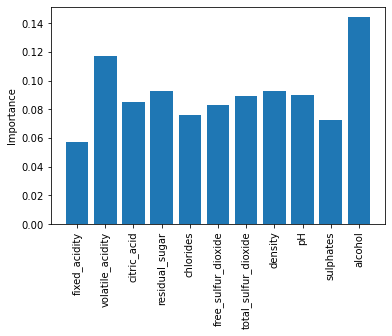

In [39]:
plt.bar(X.columns, gs_best.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

**Features (explanatory variable) with the largest importance: alcohol**  
**重要度が最大の説明変数(特徴量): alcohol**  

#### Save the best predictor  

In [40]:
tag = '12-assign2'
model_file = 'abr_best_ai-{}.joblib'.format(tag)
dump(gs_best, model_file)

['abr_best_ai-12-assign2.joblib']